<a href="https://colab.research.google.com/github/zaky76/Student_Mark_Prediction/blob/main/Students_Marks_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [ ]:
data = pd.read_csv("/content/Student_Marks.csv")
print(data.shape, '\n')
data.head(10)

(100, 3) 



,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
5,6,3.211,17.822
6,3,6.063,29.889
7,5,3.413,17.264
8,4,4.410,20.348
9,3,6.173,30.862


In [ ]:
data.isnull().mean()

number_courses    0.0
time_study        0.0
Marks             0.0
dtype: float64

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': [12.0, 8.0],
                     'font.size': 14})

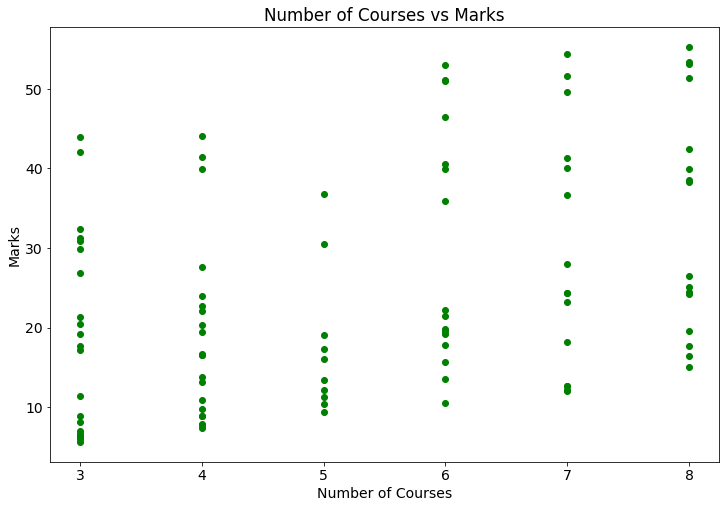

In [ ]:
plt.scatter(x=data['number_courses'], y=data['Marks'], c='g')
plt.xlabel("Number of Courses")
plt.ylabel("Marks")
plt.title("Number of Courses vs Marks");

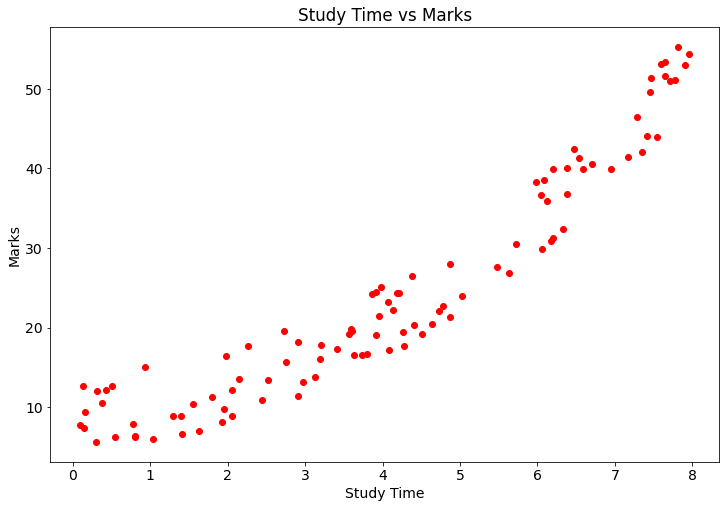

In [ ]:
plt.scatter(x=data['time_study'], y=data['Marks'], c='r')
plt.xlabel("Study Time")
plt.ylabel("Marks")
plt.title("Study Time vs Marks");

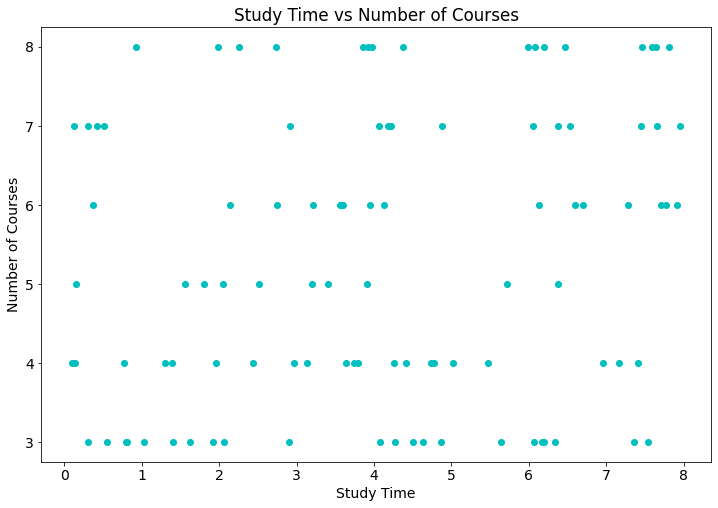

In [ ]:
plt.scatter(x=data['time_study'], y=data['number_courses'], c='c')
plt.xlabel("Study Time")
plt.ylabel("Number of Courses")
plt.title("Study Time vs Number of Courses");

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Splitting data into features and target column 
X = data[['number_courses', 'time_study']]
y = data['Marks']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Scaling data as some ML models require scaled data, such as SVR
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

(80, 2) (20, 2) (80,) (20,)


In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [ ]:
from sklearn.svm import SVR

svr_model = SVR()

svr_model.fit(X_train, y_train)
svr_preds = svr_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
print(f"Performance of Linear Regression: MAE: {mean_absolute_error(y_test, lr_preds)}")
print(f"Performance of Random Forest Regression: MAE: {mean_absolute_error(y_test, rf_preds)}")
print(f"Performance of Support Vector Regression: MAE: {mean_absolute_error(y_test, svr_preds)}")

Performance of Linear Regression: MAE: 3.0793452296666852
Performance of Random Forest Regression: MAE: 1.1139030000000045
Performance of Support Vector Regression: MAE: 5.675125230287849


In [ ]:
# We have two students with following data

student_1 = {'num_courses': 7, 'study_time': 7}
student_2 = {'num_courses': 2, 'study_time': 5}

In [ ]:
print(f"Marks of Student 1 will be: {rf_model.predict(np.array([list(student_1.values())]))[0]}")
print(f"Marks of Student 2 will be: {rf_model.predict(np.array([list(student_2.values())]))[0]}")

Marks of Student 1 will be: 41.49694
Marks of Student 2 will be: 23.819999999999983


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
